# How to Visualize graph
https://langchain-ai.github.io/langgraph/how-tos/visualization/ 

In [8]:
from langchain_core.messages import AIMessage, AnyMessage
from langgraph.graph import StateGraph
from typing_extensions import TypedDict

def init_graph():
    class State(TypedDict):
        messages: list[AnyMessage]
        extra_field: int


    def node(state: State):
        messages = state["messages"]
        new_message = AIMessage("Hello!")

        return {"messages": messages + [new_message], "extra_field": 10}

    graph_builder = StateGraph(State)
    graph_builder.add_node(node)
    graph_builder.set_entry_point("node")
    graph = graph_builder.compile()
    return graph

graph = init_graph()

## Convert graph to Mermaid syntax
- Step 1: print the graph mermaid code
    `print(graph.get_graph().draw_mermaid())`
- Step 2: See your graph with https://mermaid.live/ 
- Step 3: Get your graph image with https://mermaid.ink/

In [2]:
print(graph.get_graph().draw_mermaid())

%%{init: {'flowchart': {'curve': 'linear'}}}%%
graph TD;
	__start__([<p>__start__</p>]):::first
	node([node]):::last
	__start__ --> node;
	classDef default fill:#f2f0ff,line-height:1.2
	classDef first fill-opacity:0
	classDef last fill:#bfb6fc



## Generate graph with `draw_mermaid_png()` which uses Mermaid's API

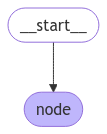

In [4]:
from IPython.display import Image, display
from langchain_core.runnables.graph import CurveStyle, MermaidDrawMethod, NodeStyles

# Show graph
display(
    Image(
        graph.get_graph().draw_mermaid_png(
            draw_method=MermaidDrawMethod.API,
        )
    )
)

## Use Mermaid + Pyppeteer

In [6]:
!uv add --group jupyter --quiet pyppeteer
!uv add --group jupyter --quiet nest_asyncio

In [9]:
import nest_asyncio
from IPython.display import Image, display

nest_asyncio.apply()  # Required for Jupyter Notebook to run async functions

display(
    Image(
        graph.get_graph().draw_mermaid_png(
            curve_style=CurveStyle.LINEAR,
            node_colors=NodeStyles(first="#ffdfba", last="#baffc9", default="#fad7de"),
            wrap_label_n_words=9,
            output_file_path=None,
            draw_method=MermaidDrawMethod.PYPPETEER,
            background_color="white",
            padding=10,
        )
    )
)

ImportError: Install Pyppeteer to use the Pyppeteer method: `pip install pyppeteer`.

## Use Graphviz

In [ ]:
!uv add --group jupyter --quiet graphviz pygraphviz

In [ ]:
from IPython.display import Image, display
from part_2_tools import graph


try:
    display(Image(graph.get_graph().draw_png()))
except ImportError as e:
    print(e)
    print(
        "You likely need to install dependencies for pygraphviz, see more here https://github.com/pygraphviz/pygraphviz/blob/main/INSTALL.txt"
    )

> Issue: Could not install `pygraphviz`
Error:
```
Resolved 1 package in 2ms
  × Failed to download and build `pygraphviz==1.14`
  ├─▶ Build backend failed to build wheel through `build_wheel`
  │   (exit status: 1)

  │   [stdout]
  │   running bdist_wheel
  │   running build
  │   running build_py
  │   copying pygraphviz/scraper.py ->
  │   build/lib.macosx-11.0-arm64-cpython-311/pygraphviz
  │   copying pygraphviz/graphviz.py ->
  │   build/lib.macosx-11.0-arm64-cpython-311/pygraphviz
  │   copying pygraphviz/__init__.py ->
  │   build/lib.macosx-11.0-arm64-cpython-311/pygraphviz
  │   copying pygraphviz/agraph.py ->
  │   build/lib.macosx-11.0-arm64-cpython-311/pygraphviz
  │   copying pygraphviz/testing.py ->
  │   build/lib.macosx-11.0-arm64-cpython-311/pygraphviz
  │   copying pygraphviz/tests/test_unicode.py ->
  │   build/lib.macosx-11.0-arm64-cpython-311/pygraphviz/tests
  │   copying pygraphviz/tests/test_scraper.py ->
  │   build/lib.macosx-11.0-arm64-cpython-311/pygraphviz/tests
  │   copying pygraphviz/tests/test_readwrite.py ->
  │   build/lib.macosx-11.0-arm64-cpython-311/pygraphviz/tests
  │   copying pygraphviz/tests/test_string.py ->
  │   build/lib.macosx-11.0-arm64-cpython-311/pygraphviz/tests
  │   copying pygraphviz/tests/__init__.py ->
  │   build/lib.macosx-11.0-arm64-cpython-311/pygraphviz/tests
  │   copying pygraphviz/tests/test_html.py ->
  │   build/lib.macosx-11.0-arm64-cpython-311/pygraphviz/tests
  │   copying pygraphviz/tests/test_node_attributes.py ->
  │   build/lib.macosx-11.0-arm64-cpython-311/pygraphviz/tests
  │   copying pygraphviz/tests/test_drawing.py ->
  │   build/lib.macosx-11.0-arm64-cpython-311/pygraphviz/tests
  │   copying pygraphviz/tests/test_repr_mimebundle.py ->
  │   build/lib.macosx-11.0-arm64-cpython-311/pygraphviz/tests
  │   copying pygraphviz/tests/test_subgraph.py ->
  │   build/lib.macosx-11.0-arm64-cpython-311/pygraphviz/tests
  │   copying pygraphviz/tests/test_close.py ->
  │   build/lib.macosx-11.0-arm64-cpython-311/pygraphviz/tests
  │   copying pygraphviz/tests/test_edge_attributes.py ->
  │   build/lib.macosx-11.0-arm64-cpython-311/pygraphviz/tests
  │   copying pygraphviz/tests/test_clear.py ->
  │   build/lib.macosx-11.0-arm64-cpython-311/pygraphviz/tests
  │   copying pygraphviz/tests/test_layout.py ->
  │   build/lib.macosx-11.0-arm64-cpython-311/pygraphviz/tests
  │   copying pygraphviz/tests/test_attribute_defaults.py ->
  │   build/lib.macosx-11.0-arm64-cpython-311/pygraphviz/tests
  │   copying pygraphviz/tests/test_graph.py ->
  │   build/lib.macosx-11.0-arm64-cpython-311/pygraphviz/tests
  │   running egg_info
  │   writing pygraphviz.egg-info/PKG-INFO
  │   writing dependency_links to
  │   pygraphviz.egg-info/dependency_links.txt
  │   writing top-level names to
  │   pygraphviz.egg-info/top_level.txt
  │   reading manifest file 'pygraphviz.egg-info/SOURCES.txt'
  │   reading manifest template 'MANIFEST.in'
  │   adding license file 'LICENSE'
  │   writing manifest file 'pygraphviz.egg-info/SOURCES.txt'
  │   copying pygraphviz/graphviz.i ->
  │   build/lib.macosx-11.0-arm64-cpython-311/pygraphviz
  │   copying pygraphviz/graphviz_wrap.c ->
  │   build/lib.macosx-11.0-arm64-cpython-311/pygraphviz
  │   running build_ext
  │   building 'pygraphviz._graphviz' extension
  │   clang -DNDEBUG -g -fwrapv -O3 -Wall -arch arm64
  │   -mmacosx-version-min=11.0 -Wno-nullability-completeness
  │   -Wno-expansion-to-defined -Wno-undef-prefix -fPIC
  │   -I/var/folders/c8/z52g4gc5679gygt8z0dx0jqm0000gn/T/tmpe6a8prsz/tools/deps/include
  │   -I/var/folders/c8/z52g4gc5679gygt8z0dx0jqm0000gn/T/tmpe6a8prsz/tools/deps/include/ncursesw
  │   -I/var/folders/c8/z52g4gc5679gygt8z0dx0jqm0000gn/T/tmpe6a8prsz/tools/deps/include/uuid
  │   -Werror=unguarded-availability-new
  │   -DSWIG_PYTHON_STRICT_BYTE_CHAR
  │   -I/Users/thanhnguyen/.cache/uv/builds-v0/.tmpSjRoYE/include
  │   -I/Users/thanhnguyen/.local/share/uv/python/cpython-3.11.1-macos-aarch64-none/include/python3.11
  │   -c pygraphviz/graphviz_wrap.c -o
  │   build/temp.macosx-11.0-arm64-cpython-311/pygraphviz/graphviz_wrap.o

  │   [stderr]
  │   warning: no files found matching '*.swg'
  │   warning: no files found matching '*.png' under directory
  │   'doc'
  │   warning: no files found matching '*.html' under directory
  │   'doc'
  │   warning: no files found matching '*.txt' under directory
  │   'doc'
  │   warning: no files found matching '*.css' under directory
  │   'doc'
  │   warning: no previously-included files matching '*~' found
  │   anywhere in distribution
  │   warning: no previously-included files matching '*.pyc'
  │   found anywhere in distribution
  │   warning: no previously-included files matching '.svn'
  │   found anywhere in distribution
  │   no previously-included directories found matching
  │   'doc/build'
  │   pygraphviz/graphviz_wrap.c:9:9: warning:
  │   'SWIG_PYTHON_STRICT_BYTE_CHAR' macro redefined
  │   [-Wmacro-redefined]
  │   #define SWIG_PYTHON_STRICT_BYTE_CHAR
  │           ^
  │   <command line>:2:9: note: previous definition is here
  │   #define SWIG_PYTHON_STRICT_BYTE_CHAR 1
  │           ^
  │   pygraphviz/graphviz_wrap.c:3023:10: fatal error:
  │   'graphviz/cgraph.h' file not found
  │   #include "graphviz/cgraph.h"
  │            ^~~~~~~~~~~~~~~~~~~
  │   1 warning and 1 error generated.
  │   error: command '/usr/bin/clang' failed with exit code 1

  ╰─▶ This error likely indicates that you need to install
      a library that provides "graphviz/cgraph.h" for
      pygraphviz@1.14
```